## Load required libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import warnings

from sklearn import tree
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.set_theme()

wine = pd.read_csv("resources/wine.csv")
unseen_data = pd.read_csv("resources/unseen.csv")

## Data Preprocessing

- Examine the dataset to see if any values are missing.

In [2]:
wine.shape

(168, 14)

In [3]:
wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

### Data Exploration

- Conduct a correlation analysis among the features, focusing on the target as the central variable.

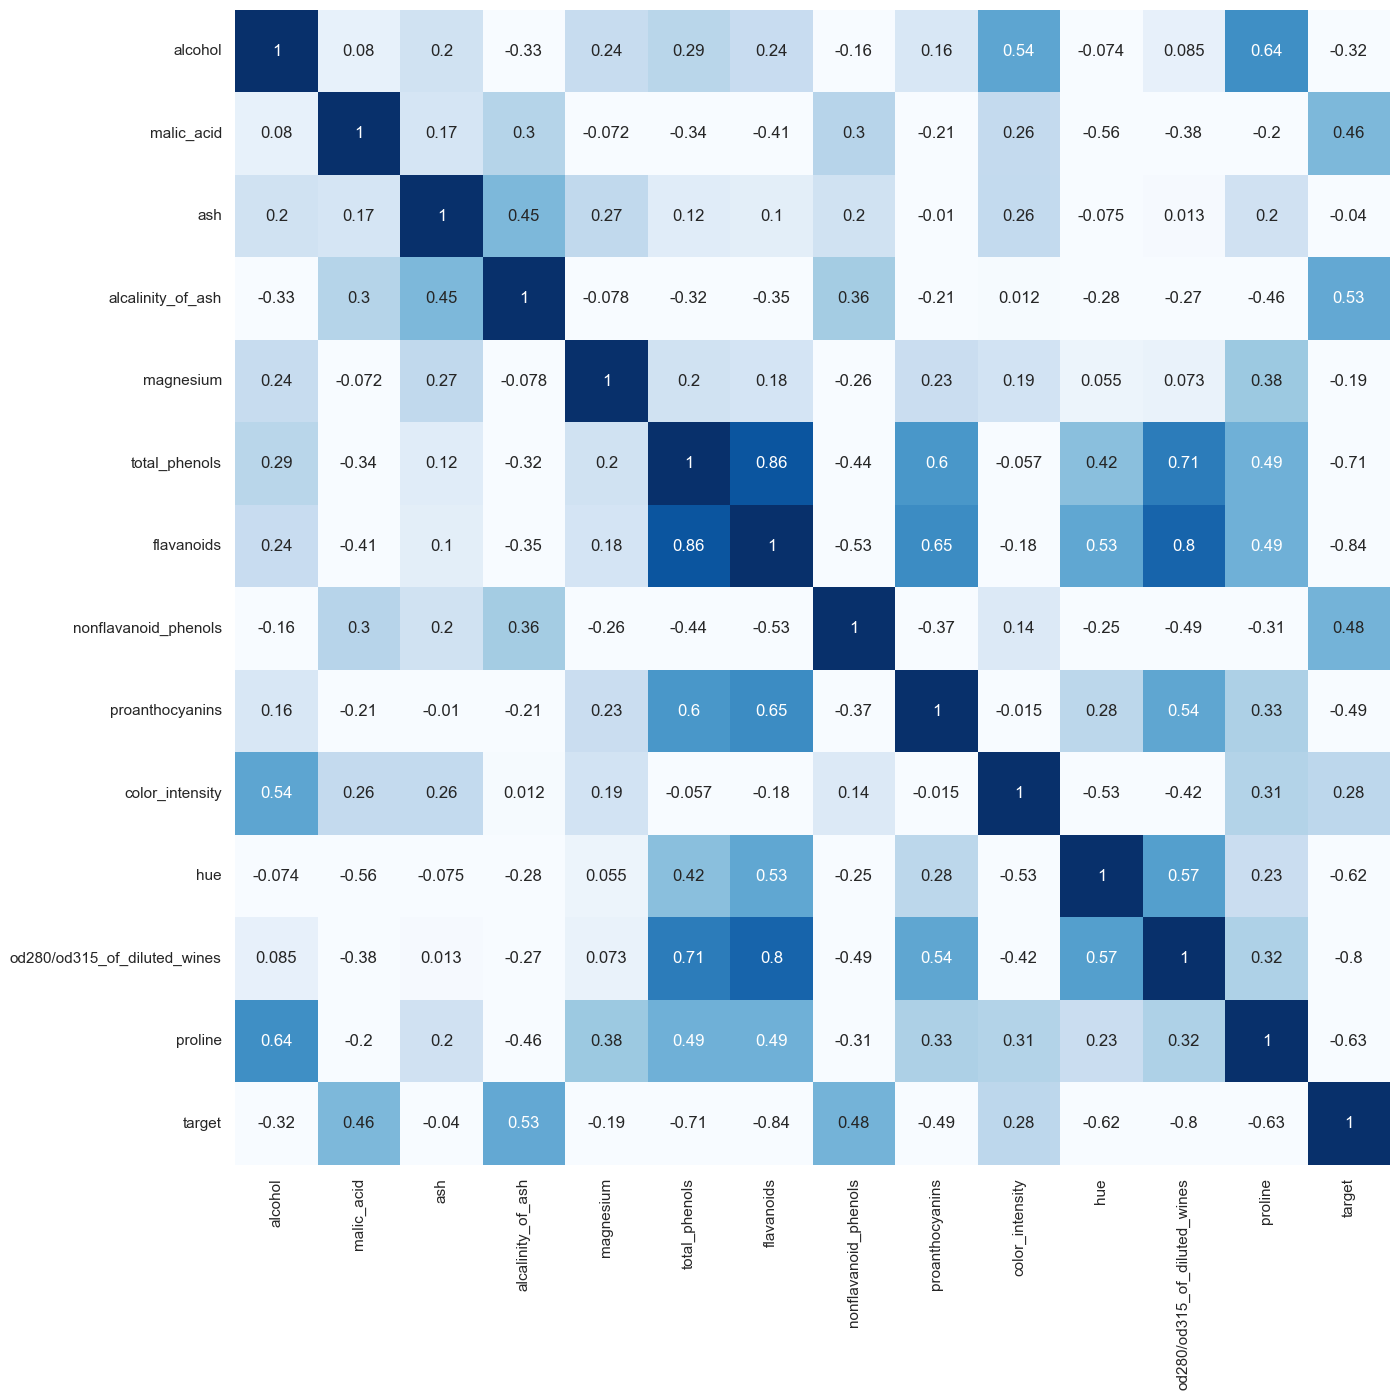

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.079599,0.195795,-0.326015,0.243891,0.289434,0.238895,-0.156799,0.157176,0.540155,-0.073703,0.085271,0.635193,-0.321521
malic_acid,0.079599,1.000000,0.174133,0.301835,-0.071536,-0.339569,-0.414050,0.297412,-0.213437,0.255794,-0.557102,-0.376522,-0.202720,0.455793
ash,0.195795,0.174133,1.000000,0.453603,0.267695,0.116323,0.103976,0.195983,-0.010499,0.257855,-0.074608,0.013156,0.200891,-0.039729
alcalinity_of_ash,-0.326015,0.301835,0.453603,1.000000,-0.078288,-0.324906,-0.354308,0.357471,-0.207306,0.011571,-0.277409,-0.267926,-0.462541,0.525254
magnesium,0.243891,-0.071536,0.267695,-0.078288,1.000000,0.197705,0.178987,-0.257525,0.233829,0.190241,0.055142,0.072924,0.379364,-0.188121
total_phenols,0.289434,-0.339569,0.116323,-0.324906,0.197705,1.000000,0.859011,-0.441140,0.604921,-0.057319,0.423790,0.709666,0.491475,-0.708097
flavanoids,0.238895,-0.414050,0.103976,-0.354308,0.178987,0.859011,1.000000,-0.528826,0.645560,-0.177127,0.534550,0.799571,0.490075,-0.841487
nonflavanoid_phenols,-0.156799,0.297412,0.195983,0.357471,-0.257525,-0.441140,-0.528826,1.000000,-0.365358,0.140380,-0.254549,-0.493432,-0.310120,0.478614
proanthocyanins,0.157176,-0.213437,-0.010499,-0.207306,0.233829,0.604921,0.645560,-0.365358,1.000000,-0.014604,0.282385,0.537787,0.328939,-0.494182
color_intensity,0.540155,0.255794,0.257855,0.011571,0.190241,-0.057319,-0.177127,0.140380,-0.014604,1.000000,-0.533820,-0.424535,0.312089,0.278205


In [4]:
plt.figure(figsize=(15, 15))
corr = wine.corr()
sns.heatmap(corr, cbar=0, vmax=1, vmin=0, square=True, annot=True, cmap='Blues')
plt.show()

corr

- According to the correlation data and plot, the correlation between alcalinity_of_ash and the target is positive and most pronounced.

- The bar graph illustrates the variations in alcalinity_of_ash levels among various types of wines.


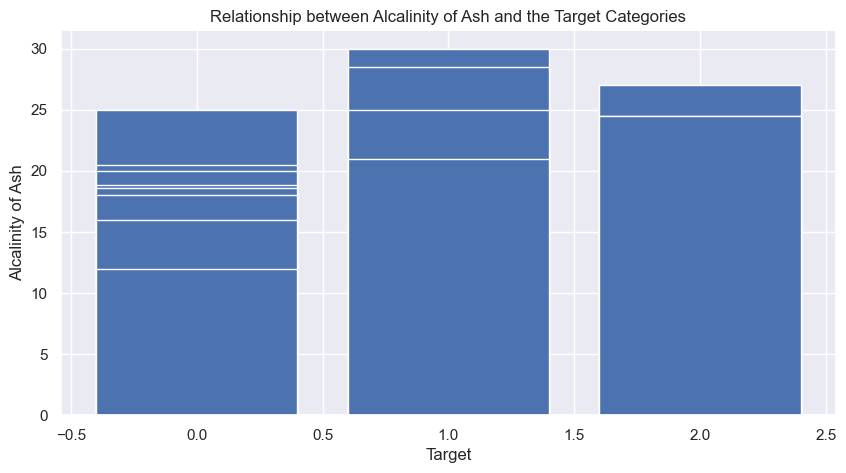

In [5]:
plt.figure(figsize=(10, 5))
plt.bar(wine['target'], wine['alcalinity_of_ash'])
plt.title('Relationship between Alcalinity of Ash and the Target Categories')
plt.xlabel('Target')
plt.ylabel('Alcalinity of Ash')
plt.show()

- The relationship between the wine classes and the alcalinity_of_ash is as shown.

- More investigation is required to see which properties determine the type of wine that falls into any of the target classes. 

- This investigation requires the use of classification models.

### Data Exploration (contd.)

- In order to achieve the required predictive outcomes of "0", "1", or "2", the implementation of classification models is imperative for this particular problem. 
- Preparing the data is a prerequisite for incorporating it into classification models. 
- Normalisation of the dataset is the initial step. When the data is normalised, its range becomes more uniform throughout its distribution. 
- Equalising the data ranges is a critical step in this context due to the presence of certain features (such as nonflavanoid_phenois) in the dataset whose values predominantly fall within the range of 0 to 1. 
- Conversely, certain elements, such as proline and magnesium, possess quantities exceeding 100. 
- This disparity in range could be problematic, as a minor modification to one characteristic might not have an impact on the other. 
- In order to mitigate this issue, the dataset ranges should be normalised to a uniform value between 0 and 1. 


In [6]:
normalizer = MinMaxScaler(feature_range=(0, 1))
normalized_wine_data = normalizer.fit_transform(wine)
normalized_wine_data = pd.DataFrame(normalized_wine_data, columns = wine.columns)
print(normalized_wine_data.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.650000    0.211462  0.668449           0.484536   0.282609   
1  0.650000    0.470356  0.673797           0.690722   0.576087   
2  0.626316    0.612648  0.406417           0.422680   0.217391   
3  0.457895    0.531621  0.331551           0.278351   0.108696   
4  0.684211    0.211462  0.716578           0.340206   0.456522   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.534483    0.478903              0.283019         0.394322   
1       0.144828    0.259494              0.169811         0.264984   
2       0.506897    0.493671              0.264151         0.337539   
3       0.224138    0.191983              0.566038         0.132492   
4       0.644828    0.542194              0.320755         0.331230   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  target  
0         0.158082  0.520325                      0.934066  0.404422     0.0  
1         0.

### Data Preparation

- In the original dataset "wine," a new column named "wine_classes" will be appended in order to classify the target in a more explicit manner. 
- Assign the values "0" to "class_0," "1" to "class_0," and "2" to "class_2."
- In the end, classification models will predict the target variable by producing "class_0," "class_1," or "class_2." 

In [7]:
wine["wine_classes"] = ["class_0" if i == 0 else "class_1" if i == 1 else "class_2" for i in wine['target']]

- Create features X and target variable y. 
- X is all the features from the normalized dataset except target. 
- y is the newly created “wine_classes” variable from the original dataset - wine.

In [8]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,wine_classes
0,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0,class_0
1,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2,class_2
2,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,0,class_0
3,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0,1,class_1
4,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0,class_0


In [9]:
X = normalized_wine_data.drop(["target"], axis = 1)
y = wine["wine_classes"]

Check and Visualize the “wine_classes” in y.

In [10]:
y.value_counts()

wine_classes
class_1    68
class_0    55
class_2    45
Name: count, dtype: int64

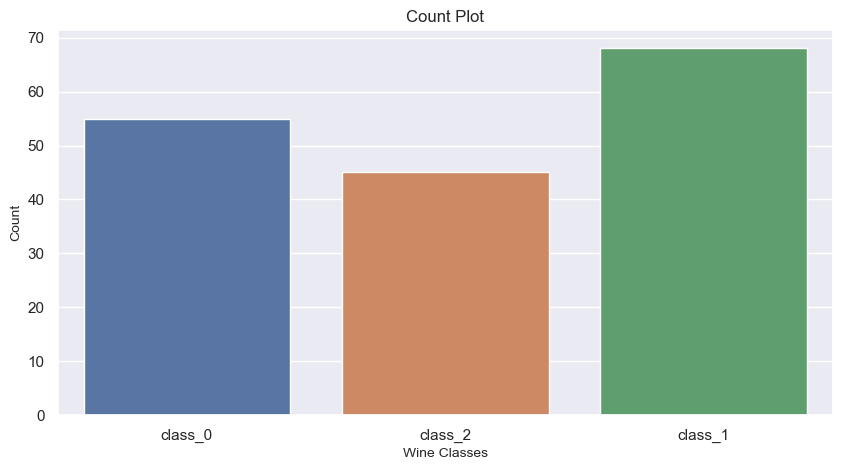

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(wine, x ='wine_classes')
plt.title('Count Plot', fontsize=12)
plt.xlabel('Wine Classes', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

## Training the Model

- By partitioning X and y, the training and testing datasets can be distinguished. 
- Retain the initial proportions of "class_0," "class_1," and "class_2" by ensuring that `stratify = y` is utilised. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200, stratify=y)

In [13]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
157,0.207895,0.144269,0.336898,0.525773,0.173913,0.344828,0.265823,0.320755,0.353312,0.018650,0.382114,0.754579,0.154779
87,0.755263,0.185771,0.406417,0.278351,0.336957,0.731034,0.643460,0.150943,0.545741,0.387211,0.349593,0.754579,0.504280
25,0.750000,0.227273,0.657754,0.226804,0.336957,0.782759,0.679325,0.075472,0.406940,0.327709,0.325203,0.838828,0.582739
151,0.734211,0.199605,0.566845,0.175258,0.445652,1.000000,0.717300,0.358491,0.460568,0.471581,0.430894,0.728938,0.650499
53,0.471053,0.519763,0.502674,0.458763,0.195652,0.172414,0.067511,0.509434,0.176656,0.756661,0.195122,0.175824,0.290300


### Baseline Classification

- In order to facilitate subsequent comparisons, it is imperative to initially develop a baseline classification model..

- By selecting the "most frequent" strategy from the DummyClassifier provided by the sklearn library, the model is able to reliably forecast the label that occurs most frequently in the training set. 

In [15]:
statistics.mode(y_train)

'class_1'

In [16]:
baseline_classifier = DummyClassifier(strategy='most_frequent',random_state=250)
baseline_classifier.fit(X_train,y_train)
acc_baseline = baseline_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.4117647058823529


The score of 0.41 means that the "class_1" label is correct 41% of the time. 

### Decision Tree Model

In [17]:
wine_data_decision_tree = DecisionTreeClassifier(random_state=250)
wine_data_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=250)

### Interpretation

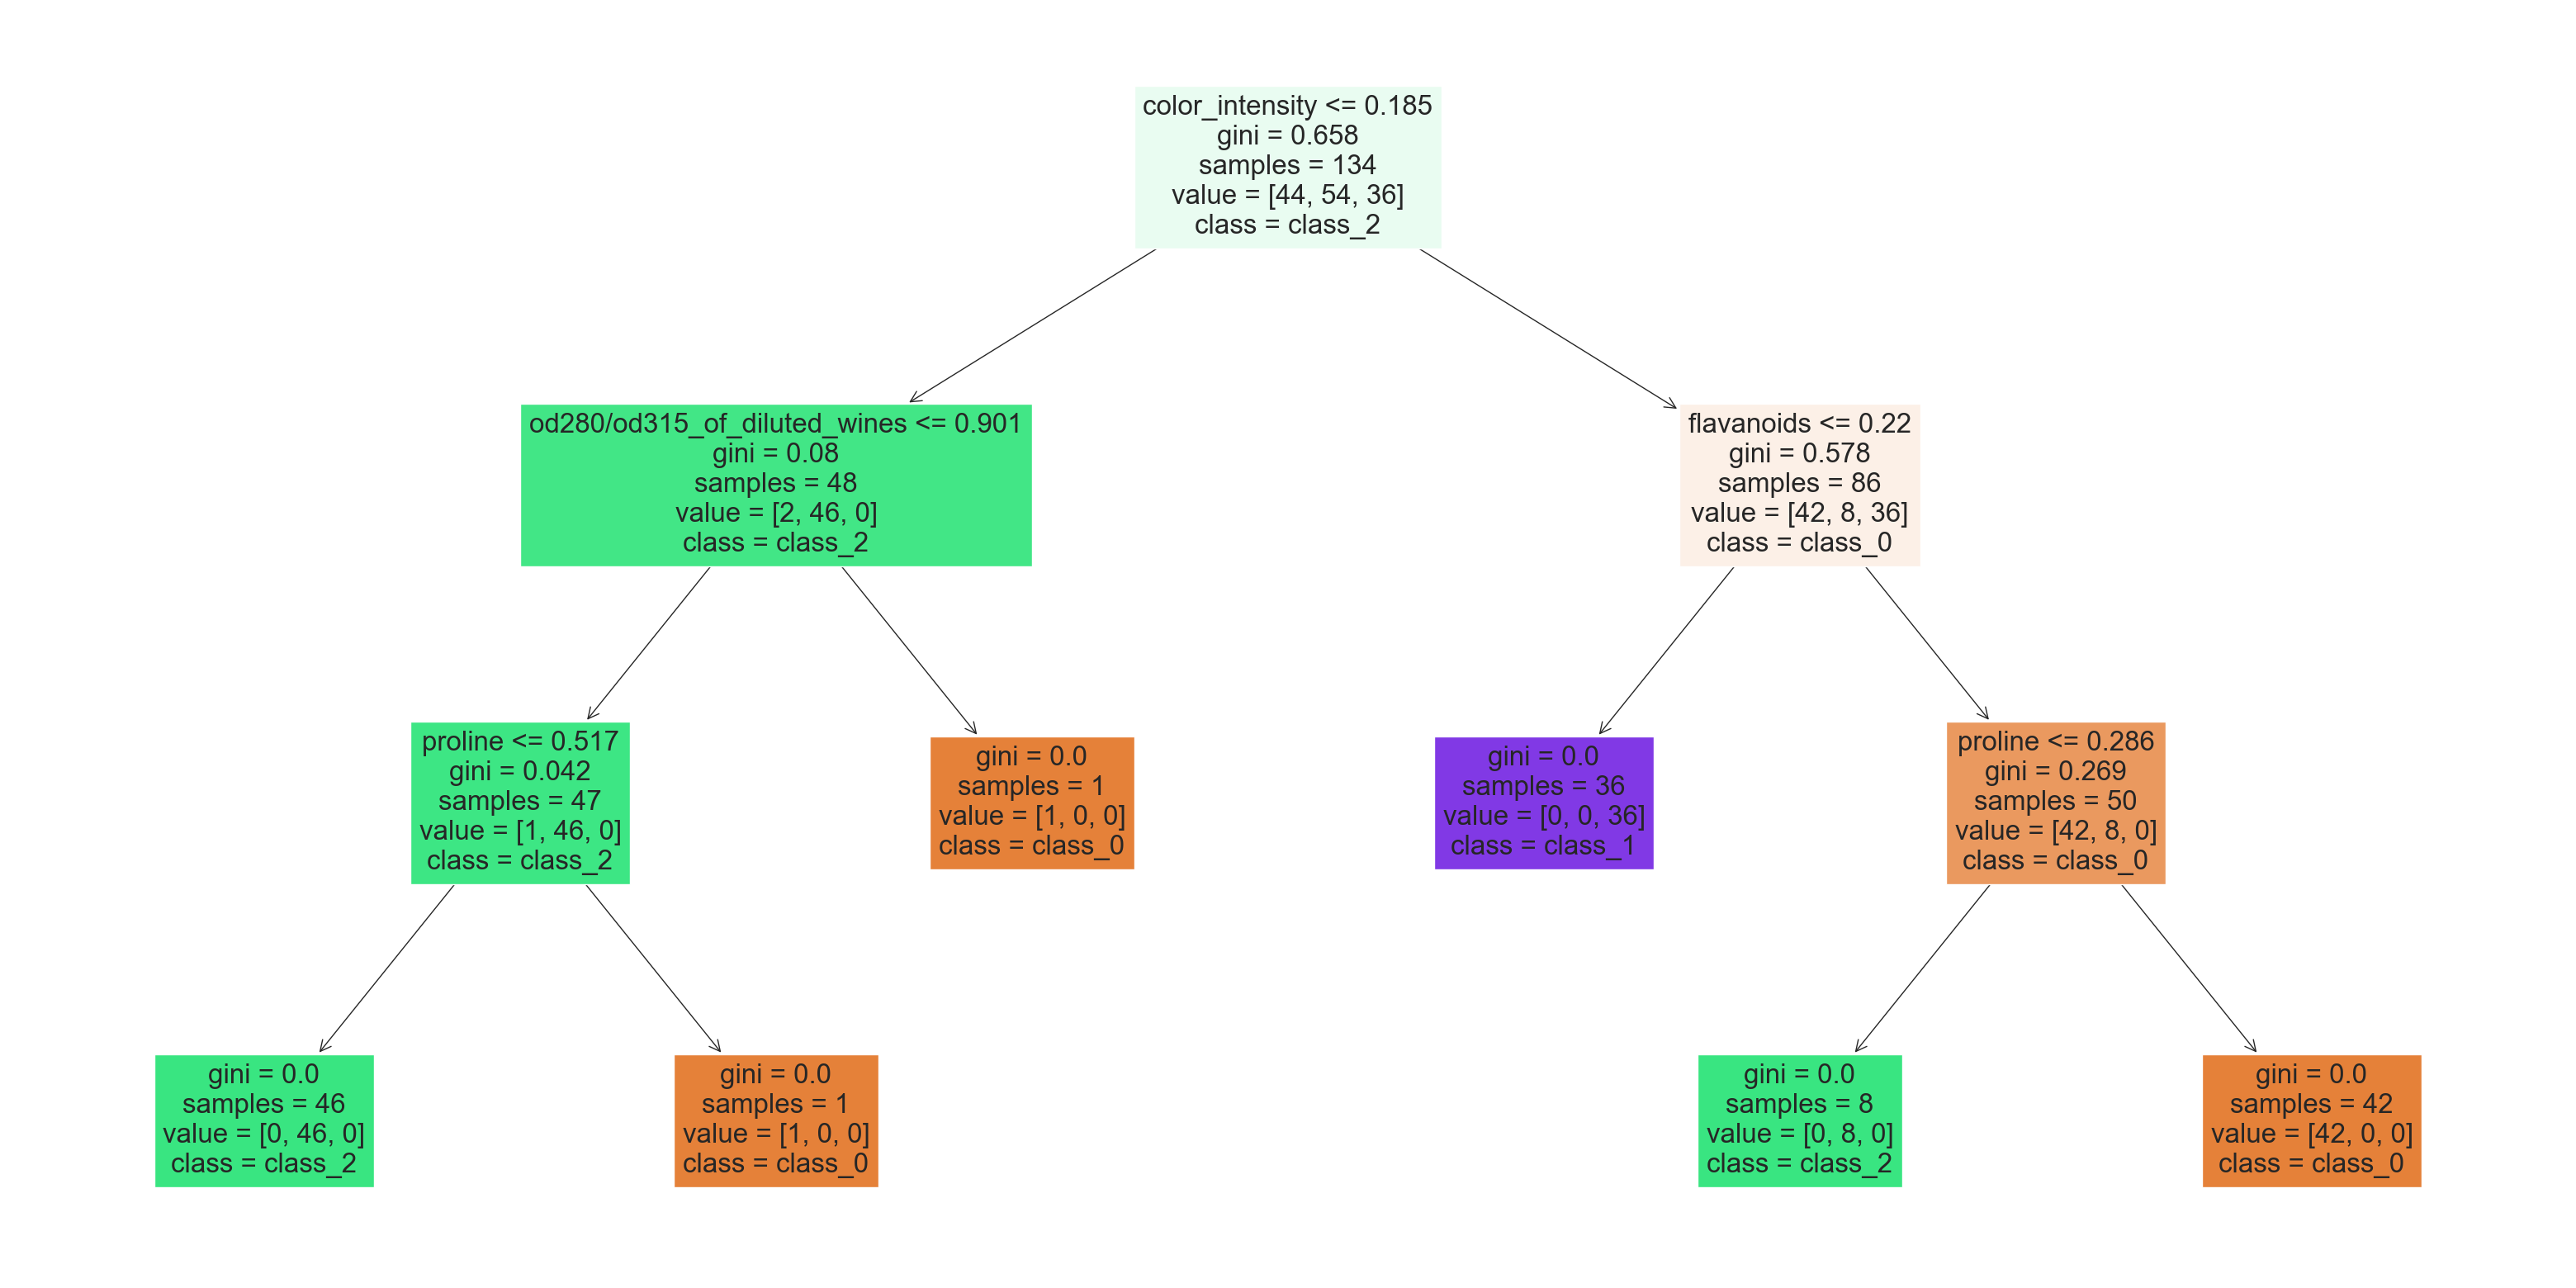

In [18]:
plt.figure(figsize=(40,20))
fn = X.columns.tolist()
cn = y.unique().tolist()
tree.plot_tree(wine_data_decision_tree, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [19]:
y_pred_train = wine_data_decision_tree.predict(X_train)
y_pred_test = wine_data_decision_tree.predict(X_test)

print("Training Accuracy: ",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy: ",accuracy_score(y_test, y_pred_test))

Training Accuracy:  1.0
Testing Accuracy:  0.8823529411764706


- The accuracy of training is 1.0. 
- This indicates the model accurately predicts outcomes for all training data. 
- It also points to the fact that this decision tree model is overfitting.
- This results in the model becoming overly specific regarding each data point, and even a minor alteration in the data can substantially impact the model.


### Feature Importance

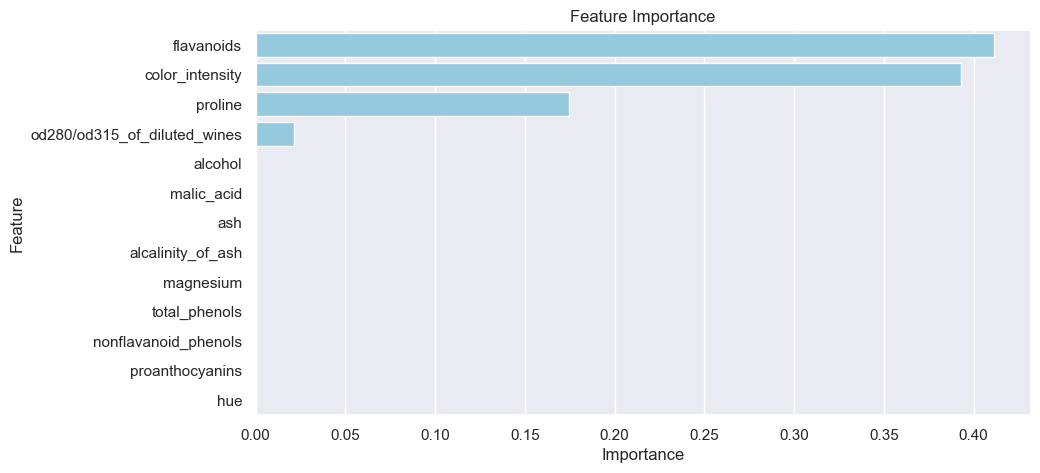

In [20]:
# Show feature importance 
feature_importance = wine_data_decision_tree.feature_importances_ 
feature_names = X.columns 

# Create a DataFrame to display feature importance 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}) 
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) 

# Plot feature importance 
plt.figure(figsize=(10, 5)) 
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='skyblue') 
plt.title('Feature Importance') 
plt.show()

## Fine-Tune Model


- Optimisation of results through identification of optimal depth and parameter values to prevent overfitting.
- The target is a model that possesses minimal bias and variance.

In [21]:
param_dist = {"max_depth": range(1,8),
              "max_features": range(1,13),
              "criterion": ["gini", "entropy"]}
wine_data_decision_tree_cv = GridSearchCV(wine_data_decision_tree, param_dist, cv=5)
wine_data_decision_tree_cv.fit(X_train,y_train)
print(wine_data_decision_tree_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 7}


In [22]:
tuned_wine_data_decision_tree = DecisionTreeClassifier(criterion = "entropy",
                                max_depth = 3,
                                max_features = 7,
                                random_state = 250)

tuned_wine_data_decision_tree.fit(X_train, y_train)

y_pred_train_new = tuned_wine_data_decision_tree.predict(X_train)
y_pred_test_new = tuned_wine_data_decision_tree.predict(X_test)

print("New Training Decision Tree Accuracy: ",accuracy_score(y_train, y_pred_train_new))
print("New Testing Decision Tree Accuracy: ",accuracy_score(y_test, y_pred_test_new))

New Training Decision Tree Accuracy:  0.9850746268656716
New Testing Decision Tree Accuracy:  0.9411764705882353


### Interpretation of Tuned Model

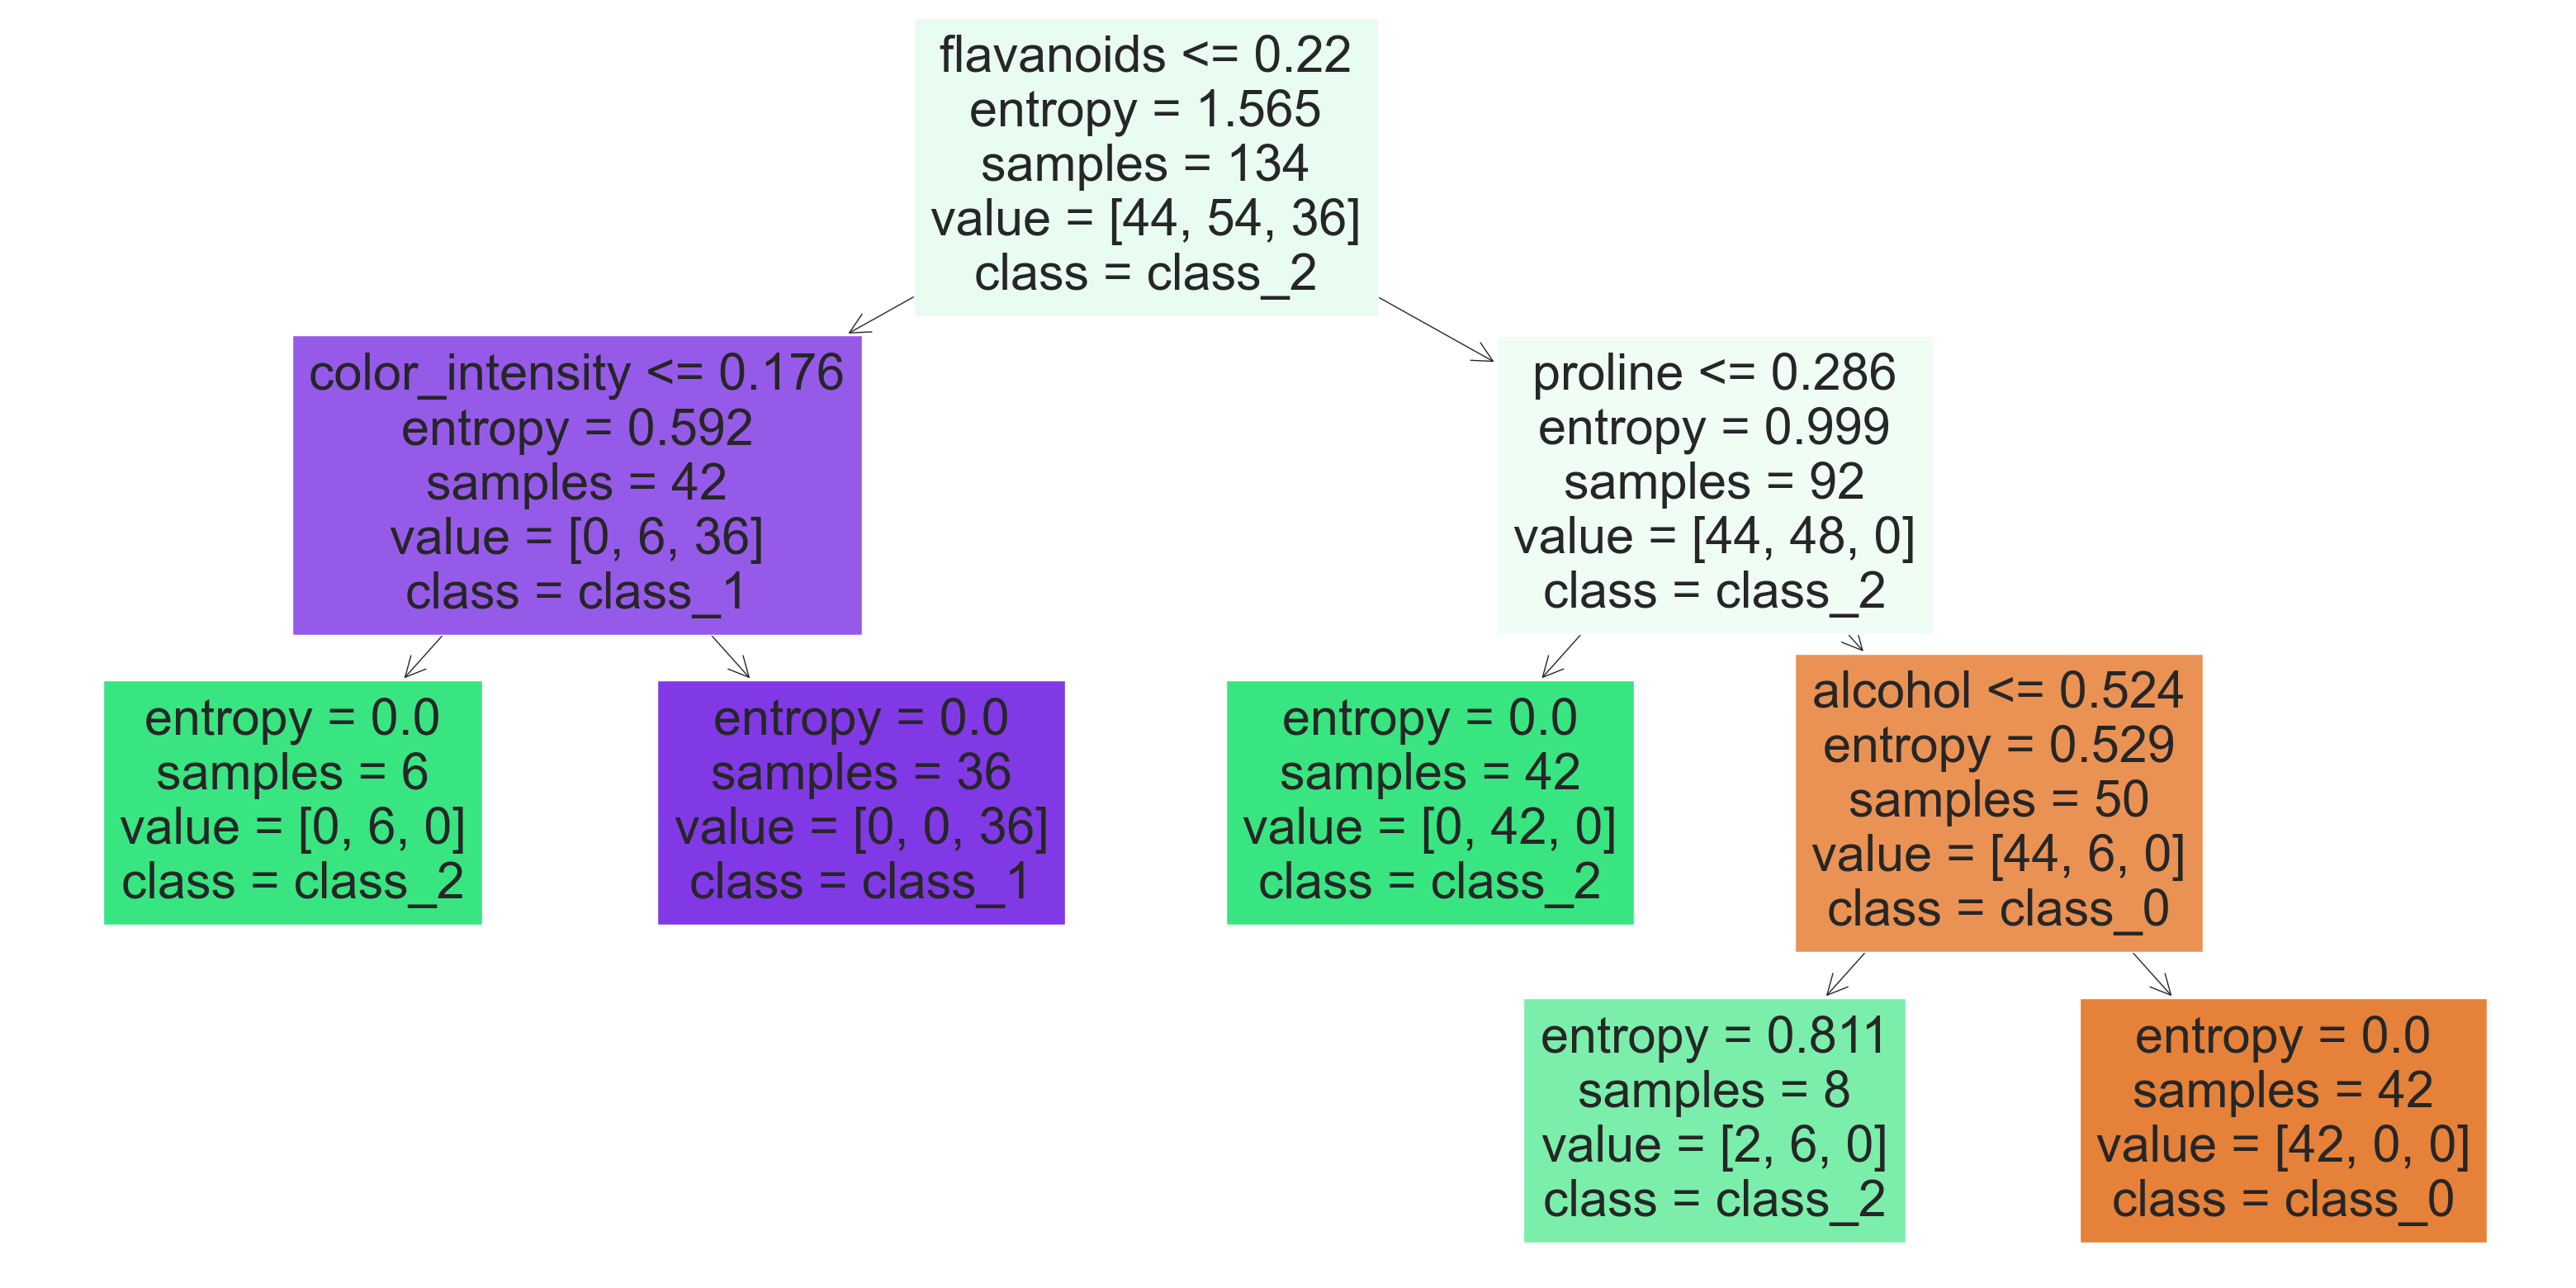

In [23]:
plt.figure(figsize=(40,20))
fn = X.columns.tolist()
cn = y.unique().tolist()
tree.plot_tree(tuned_wine_data_decision_tree, feature_names=fn, class_names=cn, filled=True)
plt.show()

### Feature Importance for Tuned Model

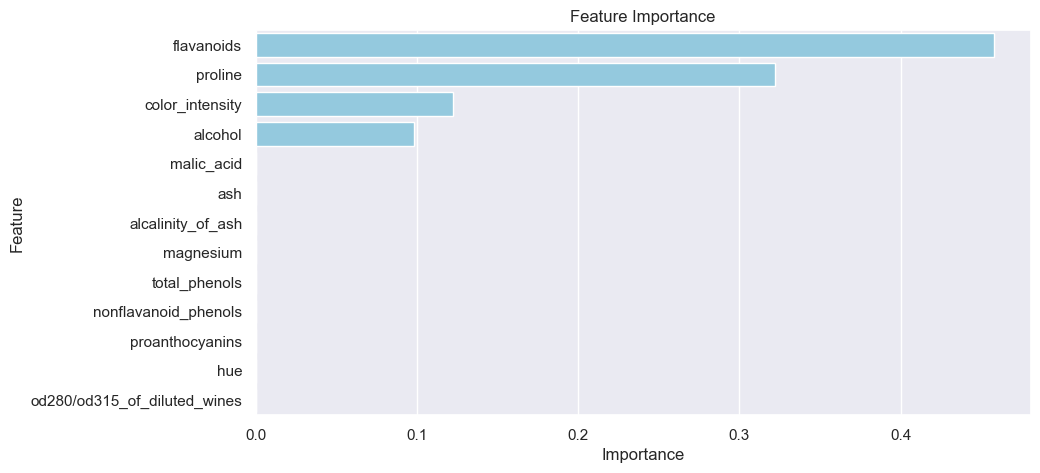

In [24]:
# Show feature importance 
feature_importance = tuned_wine_data_decision_tree.feature_importances_ 
feature_names = X.columns 

# Create a DataFrame to display feature importance 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}) 
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) 

# Plot feature importance 
plt.figure(figsize=(10, 5)) 
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='skyblue') 
plt.title('Feature Importance') 
plt.show()

## Analysis of Tuned Model

This was done using the confusion matrix

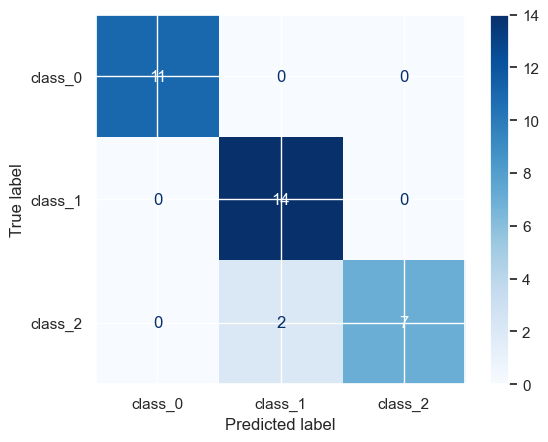

Tuned Testing Decision Tree Accuracy:  0.9411764705882353


In [25]:
y_pred = tuned_wine_data_decision_tree.predict(X_test)
ConfusionMatrixDisplay.from_estimator(tuned_wine_data_decision_tree, X_test, y_test, cmap='Blues')
plt.show()
print("Tuned Testing Decision Tree Accuracy: ",accuracy_score(y_test, y_pred))

## Apply Model to Unseen Data

In [26]:
X_test.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [27]:
unseen_data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [28]:
unseen_pred = tuned_wine_data_decision_tree.predict(unseen_data)

unseen_pred

array(['class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0'], dtype=object)

## Logistic Regression

In [29]:
X_train.shape

(134, 13)

In [30]:
y_train.shape

(134,)

In [31]:
X_test.shape

(34, 13)

In [32]:
wine_data_logistic_model = linear_model.LogisticRegression(max_iter=250)
# since this is a multiclass (rather than a binary) model, the "max_inter" parameter's main job is to raise the number of iterations and prevent the convergence error (which can happen with large data sets).

wine_data_logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=250)

In [33]:
wine_data_logistic_model.predict(X_test)

array(['class_1', 'class_2', 'class_1', 'class_0', 'class_2', 'class_2',
       'class_2', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_0', 'class_0', 'class_2', 'class_2', 'class_2', 'class_2',
       'class_1', 'class_0', 'class_1', 'class_1', 'class_0', 'class_1',
       'class_0', 'class_1', 'class_2', 'class_0', 'class_0', 'class_1',
       'class_0', 'class_1', 'class_0', 'class_2'], dtype=object)

In [34]:
wine_data_logistic_model_accuracy = wine_data_logistic_model.score(X_test,y_test)
print("Logistic Regression Model Accuracy: ", wine_data_logistic_model_accuracy)

Logistic Regression Model Accuracy:  0.9411764705882353


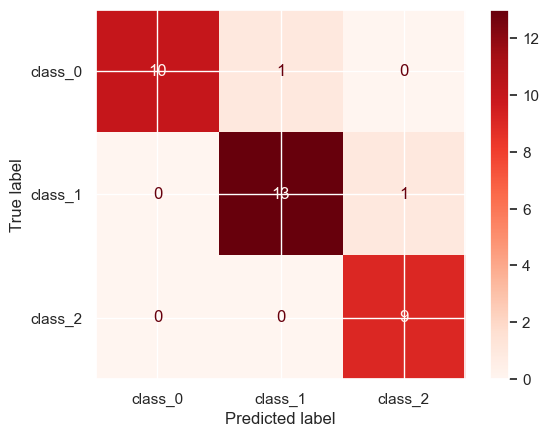

Logistic Regression Model Accuracy:  0.9411764705882353


In [35]:
y_pred = wine_data_logistic_model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(wine_data_logistic_model, X_test, y_test, cmap='Reds')
plt.show()
print("Logistic Regression Model Accuracy: ",accuracy_score(y_test, y_pred))

## Compare Model Result 


### Decision Tree Model Results 

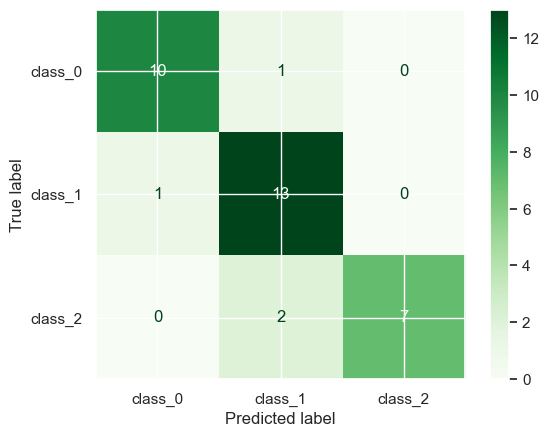

In [36]:
y_pred = wine_data_decision_tree.predict(X_test)
ConfusionMatrixDisplay.from_estimator(wine_data_decision_tree, X_test, y_test, cmap='Greens')
plt.show()

unseen_pred_decision_tree = wine_data_decision_tree.predict(unseen_data)
wine_data_decision_tree_model_accuracy = wine_data_decision_tree.score(X_test,y_test)

### Tuned Decision Tree Model Results 


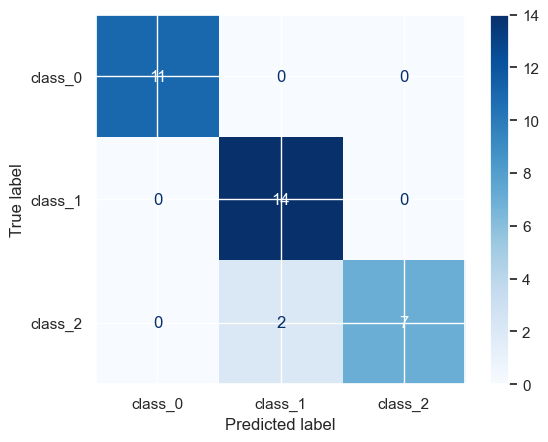

In [37]:
y_pred = tuned_wine_data_decision_tree.predict(X_test)
ConfusionMatrixDisplay.from_estimator(tuned_wine_data_decision_tree, X_test, y_test, cmap='Blues')
plt.show()

unseen_pred_tuned_decision_tree = tuned_wine_data_decision_tree.predict(unseen_data)
wine_data_tuned_decision_tree_model_accuracy = tuned_wine_data_decision_tree.score(X_test,y_test)

### Logistic Regression Model Results 


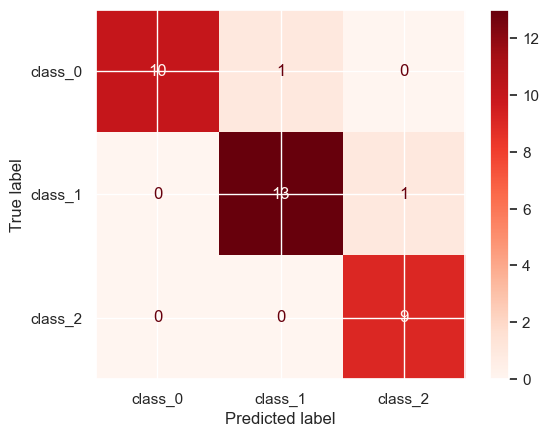

In [38]:
y_pred = wine_data_logistic_model.predict(X_test)
ConfusionMatrixDisplay.from_estimator(wine_data_logistic_model, X_test, y_test, cmap='Reds')
plt.show()

unseen_pred_logistic_regression = wine_data_logistic_model.predict(unseen_data)

In [39]:

print("Unseen Data Predictions")
print("Predictions of Unseen Data from Decision Tree Model: ",unseen_pred_decision_tree)
print("Predictions of Unseen Data from Tuned Decision Tree Model: ",unseen_pred_tuned_decision_tree)
print("Predictions of Unseen Data from Logistic Regression Model: ",unseen_pred_logistic_regression)

space = " "
print(space)

print("Accuracy of Models")
print("Decision Tree Model Accuracy: ", wine_data_decision_tree_model_accuracy)
print("Tuned Decision Tree Model Accuracy: ", wine_data_tuned_decision_tree_model_accuracy)
print("Logistic Regression Model Accuracy: ", wine_data_logistic_model_accuracy)

Unseen Data Predictions
Predictions of Unseen Data from Decision Tree Model:  ['class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0']
Predictions of Unseen Data from Tuned Decision Tree Model:  ['class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0']
Predictions of Unseen Data from Logistic Regression Model:  ['class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0']
 
Accuracy of Models
Decision Tree Model Accuracy:  0.8823529411764706
Tuned Decision Tree Model Accuracy:  0.9411764705882353
Logistic Regression Model Accuracy:  0.9411764705882353


### Important Notes 

- The Decision Tree model was 0.88 per cent less accurate than the Logistic Regression model when compared.
- The Decision Tree model was tuned to have an accuracy of 0.94, the same as the Logistic Regression model. 
- If you look at the Confusion Matrix, you can see how the tuned Decision Tree model is different from the Logistic Regression model.


### Lecturer Notes 

- Correlation is usually done after splitting.
- Tuning is to improve either accuracy or interpretability.
- Effort in explaining code should be as much as, if not more than, effort put into coding
- Comparison isn't just about the results, it's also the process.
- Have in mind that explaining the result of your code should be to the simplest form;
    - for instance in this case, work out how you'd tell the winemaker what features to use to make grades of wine.
